In [430]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.style.use('seaborn')
sns.set(font_scale=2.5)
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [431]:
submission=pd.read_csv('data/sample_submission.csv')
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

#데이터셋 확인

In [432]:
#데이터셋 확인과 이상치 및 결측치 처리
submission.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [433]:
submission.columns, train.columns, test.columns

(Index(['PassengerId', 'Survived'], dtype='object'),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [434]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [435]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [436]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [437]:
train.dtypes, test.dtypes

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 PassengerId      int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

Text(0.5, 1.0, 'missing testset')

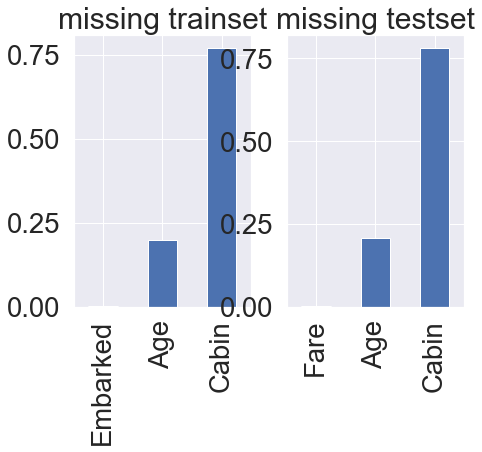

In [438]:
#결측치 확인
missing_train=train.isnull().sum()/train.shape[0]
missing_train=missing_train[missing_train>0]
missing_train.sort_values(inplace=True)
missing_test=test.isnull().sum()/test.shape[0]
missing_test=missing_test[missing_test>0]
missing_test.sort_values(inplace=True)

f,ax=plt.subplots(1,2,figsize=(7,5))
missing_train.plot.bar(ax=ax[0])
missing_test.plot.bar(ax=ax[1])
ax[0].set_title('missing trainset')
ax[1].set_title('missing testset')

#Canbin은 결측치가 80%로 분석 대상에서 제외한다

In [439]:
train.describe(), test.describe()

(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  ,
        PassengerId      Pclass         Age       SibSp      

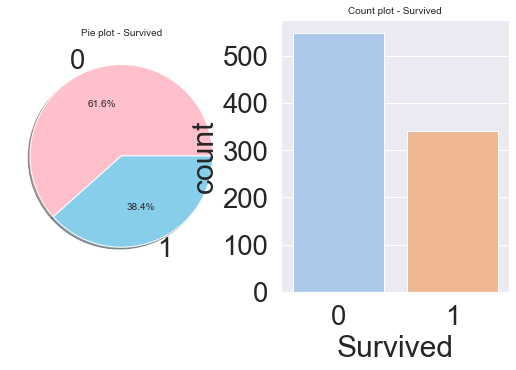

In [440]:
f, ax=plt.subplots(1, 2, figsize=(9,5))

train['Survived'].value_counts().plot.pie(explode=[0,0.0],autopct='%1.1f%%', 
ax=ax[0], shadow='True', colors=['pink', 'skyblue'])
ax[0].set_title('Pie plot - Survived', fontsize=10)
ax[0].set_ylabel('')

sns.set(font_scale=1)
sns.set_palette('pastel')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived', fontsize=10)

plt.show()

1) 수치형 컬럼과 범주형 컬럼이 나뉨 <br>
2) train셋에서 Embarked, Age, Cabin 컬럼의 결측치가 확인됨 <br>
3) test셋에서 Fare, Age, Cabin 컬럼의 결측치가 확인됨 <br>
4) Cabin컬럼은 결측치가 80%가 넘어가기 때문에 분석 대상에서 제외함

#탐색적 데이터 분석

Text(0.5, 1.0, 'Survived Pclass')

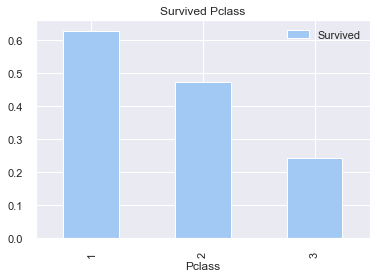

In [441]:
#표 등급에 따른 생존률
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar().set_title('Survived Pclass')

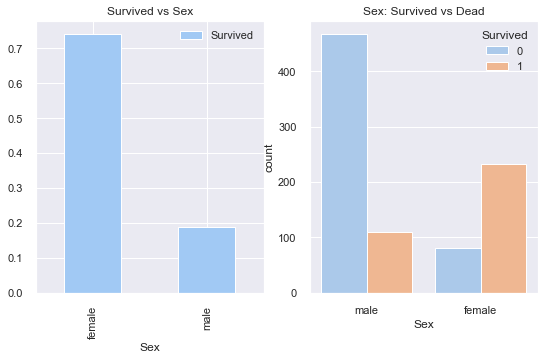

In [442]:
#성별에 따른 생존률
f, ax = plt.subplots(1, 2, figsize=(9, 5))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

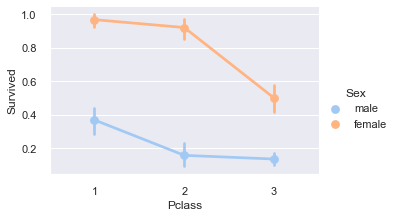

In [443]:
#성별과 티켓 등급에 따른 생존률
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size=3, aspect=1.5)

최고령 승객: 80.0 Years
최연소 승객: 0.4 Years
승객 평균연령: 29.7 Years


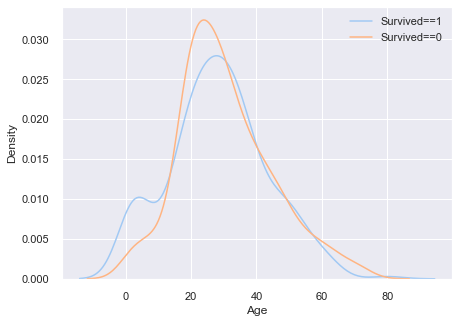

In [444]:
#나이에 따른 생존률
print('최고령 승객: {:.1f} Years'. format(train['Age'].max()))
print('최연소 승객: {:.1f} Years'. format(train['Age'].min()))
print('승객 평균연령: {:.1f} Years'. format(train['Age'].mean()))
fig, ax=plt.subplots(1,1,figsize=(7,5))
sns.kdeplot(train[train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])

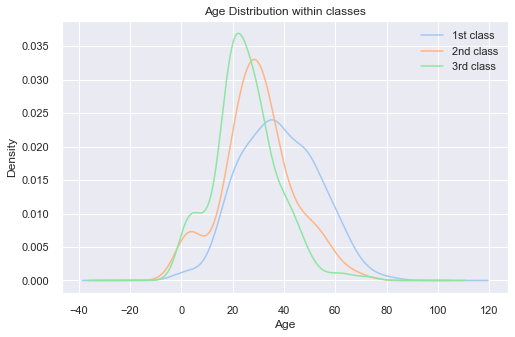

In [445]:
#나이와 티켓 등급에 따른 생존률
plt.figure(figsize=(8,5))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

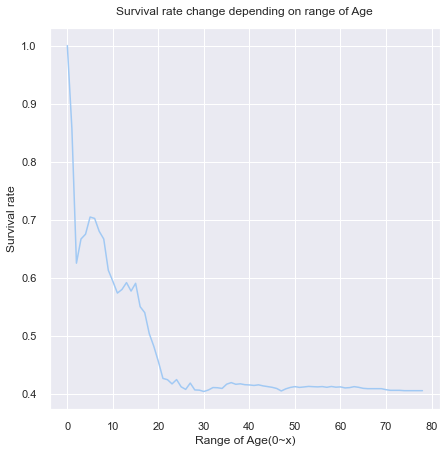

In [446]:
#나이에 따른 생존 확률 누적 분포
cummulate_survival_ratio=[]
for i in range(1,80):
    cummulate_survival_ratio.append(train[train['Age']<i]['Survived'].sum()/
    len(train[train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

<AxesSubplot:xlabel='Embarked'>

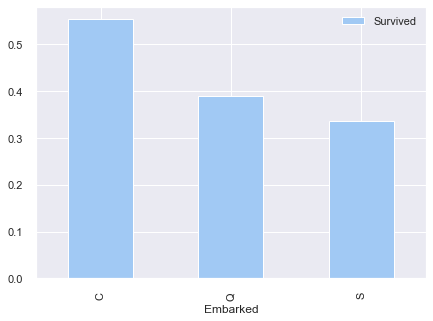

In [447]:
#탑승 항구에 따른 생존 확률
f, ax=plt.subplots(1,1, figsize=(7,5))
train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().plot.bar(ax=ax)

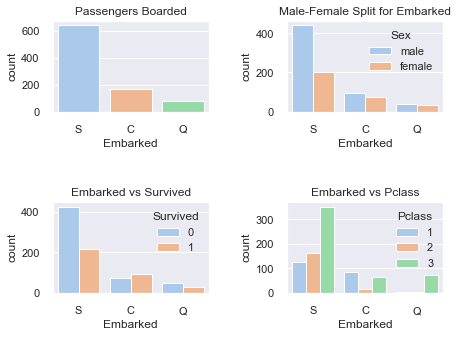

In [448]:
# 탑승 항구와 타 변수와의 상관관계
f, ax=plt.subplots(2,2, figsize=(7,5))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()

In [449]:
#새로운 변수인 '가족의 수' 생성
train['FamilySize']=train['SibSp']+train['Parch']+1 #본인 포함
test['FamilySize']=test['SibSp']+test["Parch"]+1
print('Maximum size of Family', train['FamilySize'].max())
print('Minimum size of Family', test['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


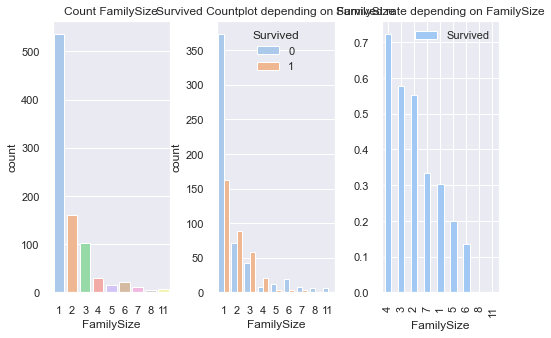

In [450]:
#가족의 수에 따른 생존확률
f,ax=plt.subplots(1, 3, figsize=(8,5))
sns.countplot(train['FamilySize'], data=train, ax=ax[0])
ax[0].set_title('Count FamilySize')

sns.countplot(train['FamilySize'], hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Survived Countplot depending on FamilySize')

train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize')

plt.subplots_adjust(wspace=0.4, hspace=0.5)
plt.show()

In [451]:
#왜도와 첨도 확인을 위해 범주형, 수치형 나누기
numerical_feats=train.dtypes[train.dtypes!='object'].index
categorical_feats=train.dtypes[train.dtypes=='object'].index

In [452]:
numerical_feats_test=test.dtypes[test.dtypes!='object'].index
categorical_feats_test=test.dtypes[test.dtypes=='object'].index

In [453]:
for col in numerical_feats:
    print('{:15}'.format(col),
    'Skewness: {:05.2f}'.format(train[col].skew()),'  ',
    'Kutosis: {:06.2f}'.format(train[col].kurt())
    )

PassengerId     Skewness: 00.00    Kutosis: -01.20
Survived        Skewness: 00.48    Kutosis: -01.78
Pclass          Skewness: -0.63    Kutosis: -01.28
Age             Skewness: 00.39    Kutosis: 000.18
SibSp           Skewness: 03.70    Kutosis: 017.88
Parch           Skewness: 02.75    Kutosis: 009.78
Fare            Skewness: 04.79    Kutosis: 033.40
FamilySize      Skewness: 02.73    Kutosis: 009.16


1) 왜도(Skewness) : a=0 정규분포, a<0 오른쪽 치우침, a>0 왼쪽 치우침 <br>
2) 첨도(Kutosis) : a=3 정규분포, a<3 정규분포 대비 완만, a>3 정규분포 대비 뾰족 <br>
3) 왜도와 첨도값을 확인하고 정규분포에 가깝게 만들어주기 위해 변수에 log 취함 (정규성을 높여 분석의 정확도 향상) <br>

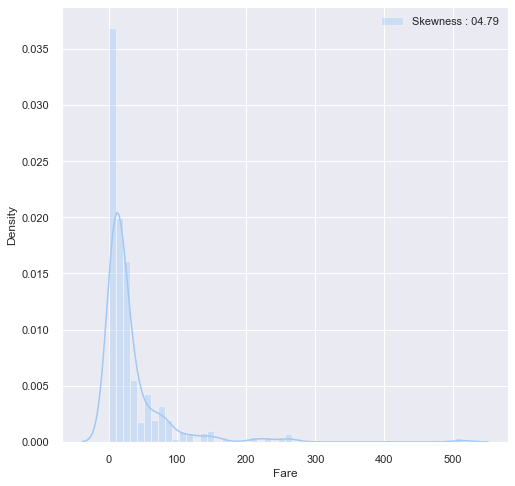

In [454]:
#Fare 첨도 시각화
f, ax=plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(train['Fare'], label='Skewness : {:05.2f}'.format(train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [455]:
#testset의 fare 결측치를 평균값으로 채우기
test.loc[test.Fare.isnull(), 'Fare']=test['Fare'].mean()

In [456]:
#첨도와 왜도가 심한 Fare 변수에 Log를 취해 정규화
train['Log_Fare']=np.log1p(train['Fare'])
test['Log_Fare']=np.log1p(test['Fare'])

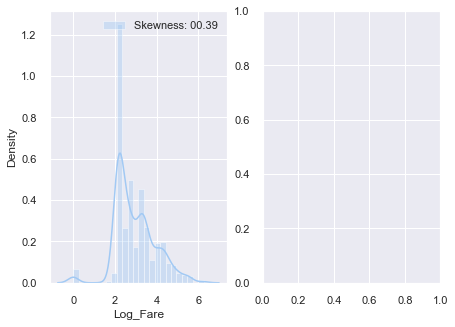

In [457]:
#정규화 결과 시각화
f, ax=plt.subplots(1,2,figsize=(7,5))
g=sns.distplot(train['Log_Fare'], label='Skewness: {:05.2f}'.format(train['Log_Fare'].skew()), ax=ax[0])
g=g.legend(loc='best')

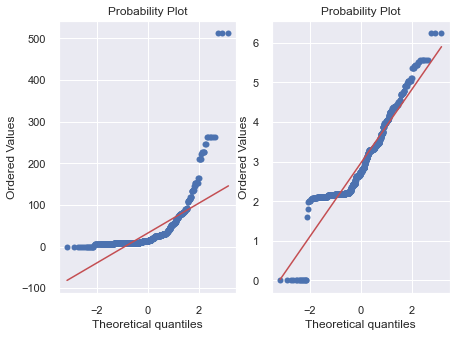

In [458]:
#정규화 전후의 probplot 확인
import scipy.stats
fig = plt.figure(figsize = (7,5))
fig.add_subplot(1,2,1)
res = scipy.stats.probplot(train['Fare'], plot=plt)
fig.add_subplot(1,2,2)
res = scipy.stats.probplot(train['Log_Fare'], plot=plt)

In [459]:
#Fare를 Log_Fare로 대치 후 기존 Log_Fare 삭제
train['Fare']=train['Log_Fare']
del train['Log_Fare']

In [460]:
test['Fare']=test['Log_Fare']
del test['Log_Fare']

<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

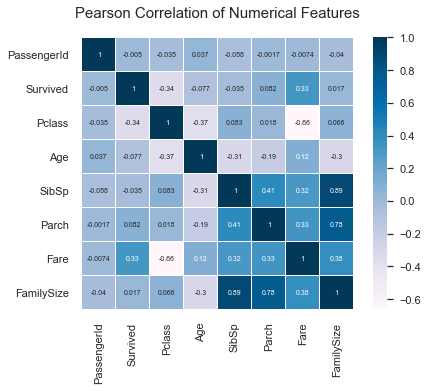

In [461]:
#수치형 변수간 상관계수 확인
heatmap_data=train[numerical_feats]
colormap=plt.cm.PuBu
plt.figure(figsize=(7,5))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.2, vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':7})

1. 여자, 나이가 적을수록, 티켓 등급이 높을수록 생존자가 높은 것으로 나타남
2. C 탑승구를 이용한 승객의 생존자 비율이 높은 것으로 나타났으며 티켓 클래스가 높은 승객이 많기 때문인 것으로 분석됨
3. S 탑승구에서 가장 많은 승객, 특히 남자 승객이 많이 탑승했으며 3rd class 승객이 가장 많음
4. S 탑승구의 생존확률이 가장 낮음
5. 가족이 2~4명일 때 생존 확률이 가장 높으며 가족 수가 너무 많거나 작으면 생존 확률이 낮아짐
6. Fare변수의 왜도와 첨도가 커 정규화를 수행하였음
7. 피어슨 상관관계를 살펴본 결과 Fare에서 가장 큰 양의 상관관계를, Pclass에서 가장 큰 음의 상관관계를 보임

#특성공학

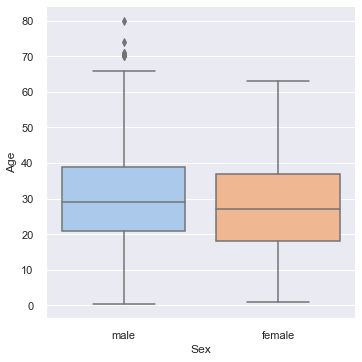

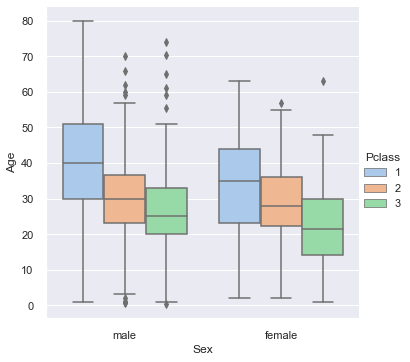

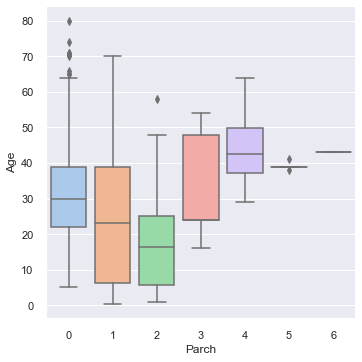

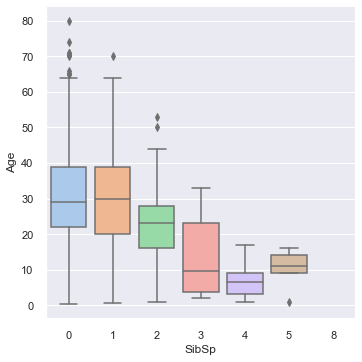

In [462]:
#age의 nan값을 채우기 위해 age와 상관성이 있는 변수를 도출한다.
g=sns.factorplot(y='Age', x='Sex', data=train, kind='box')
g=sns.factorplot(y='Age', x='Sex', hue='Pclass', data=train, kind='box')
g=sns.factorplot(y='Age', x='Parch', data=train, kind='box')
g=sns.factorplot(y='Age', x='SibSp', data=train, kind='box')

In [463]:
train['encoding_sex']=train['Sex'].map({'male':0, 'female':1})
train['Sex']=train['encoding_sex']
del train['encoding_sex']

In [464]:
test['encoding_sex']=test['Sex'].map({'male':0, 'female':1})
test['Sex']=test['encoding_sex']
del test['encoding_sex']

<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

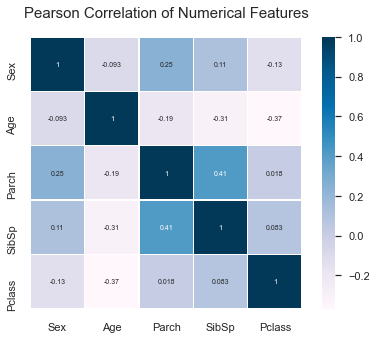

In [466]:
plt.figure(figsize=(7,5))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(train[['Sex','Age','Parch','SibSp','Pclass']].astype(float).corr(), linewidth=0.2, vmax=1.0,
square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':7})

Age의 결측치를 채우기 위해 음의 상관관계를 보이는 Parch, SibSp, Pclass를 활용한다.

In [467]:
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)
index_NaN_age_test = list(test["Age"][test["Age"].isnull()].index)

In [468]:
for i in index_NaN_age :
    age_med = train["Age"].median()
    age_pred = train["Age"][((train['SibSp'] == train.iloc[i]["SibSp"]) & (train['Parch'] == train.iloc[i]["Parch"]) & (train['Pclass'] == train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train['Age'].iloc[i] = age_pred
    else :
        train['Age'].iloc[i] = age_med

for i in index_NaN_age_test :
    age_med = test["Age"].median()
    age_pred = test["Age"][((test['SibSp'] == test.iloc[i]["SibSp"]) & (test['Parch'] == test.iloc[i]["Parch"]) & (test['Pclass'] == test.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test['Age'].iloc[i] = age_pred
    else :
        test['Age'].iloc[i] = age_med

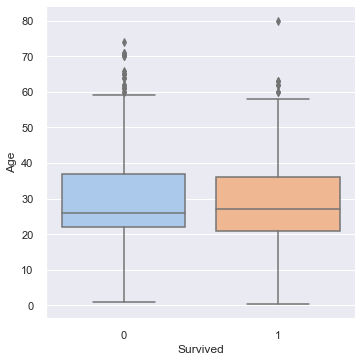

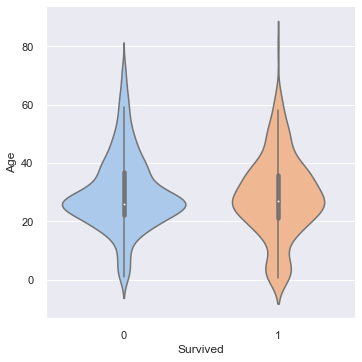

In [469]:
g=sns.factorplot(y='Age', x='Survived', data=train, kind='box')
g=sns.factorplot(y='Age', x='Survived', data=train, kind='violin')

1. 결측치를 채운 후 바이올린플롯으로 확인 결과 청년층의 생존 확률이 높은 것으로 나타남
2. 결측치를 채우기 전의 결과와 비슷한 형태의 결과임

In [474]:
train['Embarked'].fillna('S', inplace=True)

Name 컬럼 변환

In [475]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

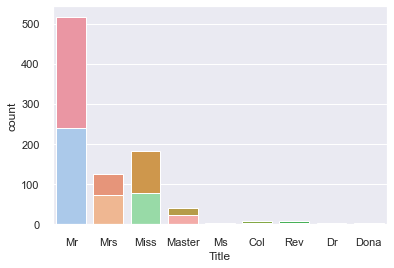

In [476]:
train_title=(i.split(',')[1].split('.')[0].strip() for i in train['Name'])
train['Title']=pd.Series(train_title)
sns.countplot(train["Title"], data=train)
train['Title'].unique()

test_title=(i.split(',')[1].split('.')[0].strip() for i in test['Name'])
test['Title']=pd.Series(test_title)
sns.countplot(test["Title"], data=test)
test['Title'].unique()

In [477]:
train['Title']=train['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer'],'Others')
train['change_Title']=train['Title'].map({'Master':0, 'Mr':1, 'Miss':2, 'Mrs':2, 'Mme':2, 'Ms':2, 'Mlle':2, 'Others':3})
train['Title']=train['change_Title']
del train['change_Title']

test['Title']=test['Title'].replace(['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer'],'Others')
test['change_Title']=test['Title'].map({'Master':0, 'Mr':1, 'Miss':2, 'Mrs':2, 'Mme':2, 'Ms':2, 'Mlle':2, 'Others':3})
test['Title']=test['change_Title']
del test['change_Title']

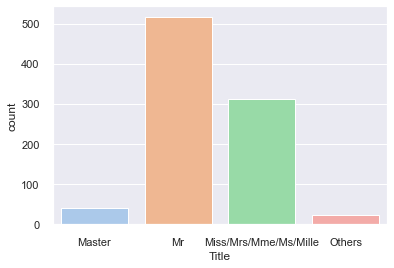

In [478]:
g=sns.countplot(train['Title'])
g=g.set_xticklabels(['Master', 'Mr', 'Miss/Mrs/Mme/Ms/Mille', 'Others'])

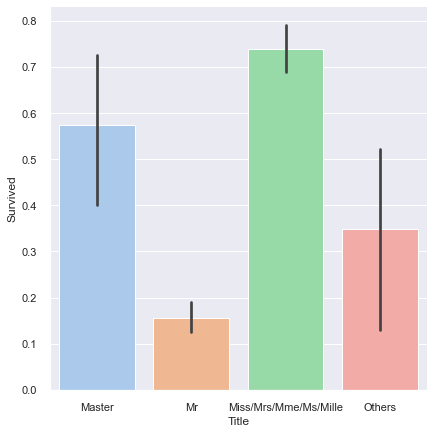

In [479]:
g=sns.factorplot(y='Survived', x='Title', data=train, kind='bar', size=6)
g=g.set_xticklabels(['Master', 'Mr', 'Miss/Mrs/Mme/Ms/Mille', 'Others'])

In [480]:
del train['Name']
del test['Name']

In [481]:
train['single_F']=train['FamilySize'].map(lambda x : 1 if x==1 else 0)
train['small_F']=train['FamilySize'].map(lambda x: 1 if x==2 else 0)
train['medium_F']=train['FamilySize'].map(lambda x: 1 if 2<x<=4 else 0)
train['large_F']=train['FamilySize'].map(lambda x: 1 if x>4 else 0)

test['single_F']=test['FamilySize'].map(lambda x : 1 if x==1 else 0)
test['small_F']=test['FamilySize'].map(lambda x: 1 if x==2 else 0)
test['medium_F']=test['FamilySize'].map(lambda x: 1 if 2<x<=4 else 0)
test['large_F']=test['FamilySize'].map(lambda x: 1 if x>4 else 0)

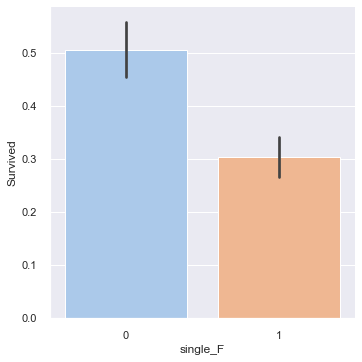

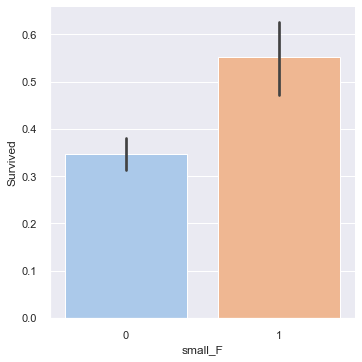

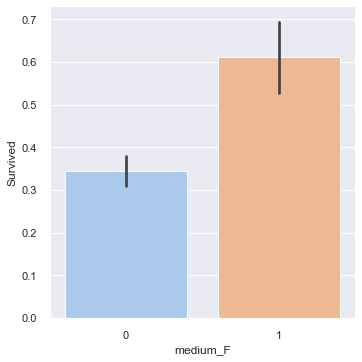

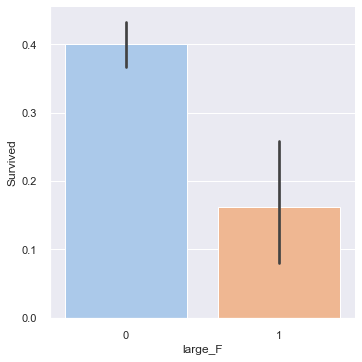

In [482]:
sns.factorplot(y='Survived', x='single_F', data=train, kind='bar')
sns.factorplot(y='Survived', x='small_F', data=train, kind='bar')
sns.factorplot(y='Survived', x='medium_F', data=train, kind='bar')
sns.factorplot(y='Survived', x='large_F', data=train, kind='bar')

범주형 변수를 1과 0으로 더미화

In [483]:
train=pd.get_dummies(train, columns=['Title'])
train=pd.get_dummies(train, columns=['Embarked'])

test=pd.get_dummies(test, columns=['Title'])
test=pd.get_dummies(test, columns=['Embarked'])

예측에 사용하지 않는 불필요 컬럼 제거

In [484]:
train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'FamilySize'], axis=1, inplace=True)
test.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [485]:
del test['FamilySize']

#모델 개발 및 학습

In [486]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split

In [487]:
#target_label과 학습용 데이터를 train 데이터셋으로부터 분리
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [488]:
#교차검증을 통해 알고리즘의 정확도 탐색
kfold=StratifiedKFold(n_splits=10)

In [489]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [490]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_tr, y = y_tr, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

In [491]:
cv_res=cv_res.sort_values(by='CrossValMeans', ascending=True)
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.707746,0.031000,SVC
7,0.775117,0.039959,KNeighboors
1,0.778130,0.031036,DecisionTree
4,0.783588,0.055771,ExtraTrees
2,0.791980,0.067925,AdaBoost
3,0.796283,0.048023,RandomForest
6,0.815884,0.051673,MultipleLayerPerceptron
8,0.815943,0.047937,LogisticRegression
9,0.821518,0.049878,LinearDiscriminantAnalysis
5,0.824413,0.042343,GradientBoosting


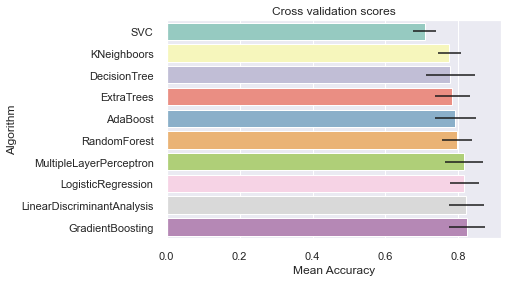

In [492]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",**{'xerr':cv_std},orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

1. 성능이 좋은 Gradient Boosting 모델 사용
2. 배깅 기법(분류) : 랜덤포레스트
3. 부스팅(분류, 회귀 둘다 가능) : 그래디언트부스팅
4. 배깅 : 여러번 뽑아서 확률이 높은 모델 사용
5. 부스팅 : 가중치를 부여하여 최종 강분류기 도출

GridSearch를 활용한 하이퍼파라미터 튜닝

In [493]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_tr, y_tr)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.8145931142410016

In [494]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

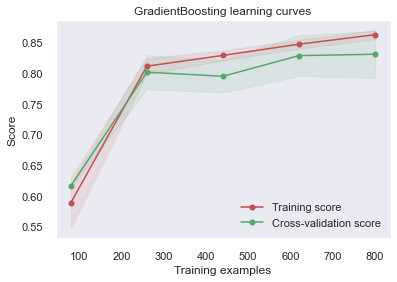

In [495]:
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,target_label,cv=kfold)

In [496]:
from sklearn.metrics import accuracy_score

In [497]:
prediction = gsGBC.best_estimator_.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * accuracy_score(prediction, y_vld)))

총 179명 중 84.92% 정확도로 생존을 맞춤


In [498]:
from pandas import Series
feature_importance = gsGBC.best_estimator_.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

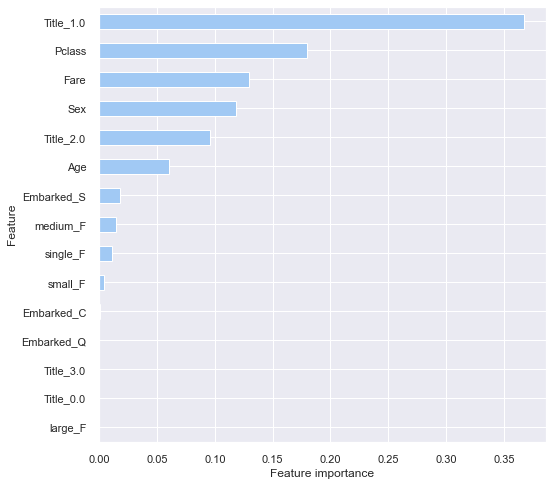

In [499]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#예측해보기

In [500]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [504]:
prediction = gsGBC.best_estimator_.predict(X_test)
submission['Survived'] = prediction

In [505]:
submission.to_csv('titanic_submission.csv', index=False)